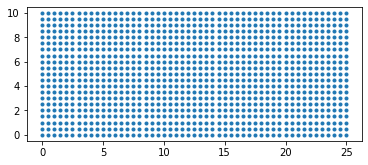

Path result/SlopeFailureAnalysis existed already, continue with writting files


In [5]:
import mp_parser
import matplotlib.pyplot as plt


# Mesh Generation
a = mp_parser.mesh(.5)
a.setMesh(25, 10)
filled = a.nodes
# print(filled)
x = [i[0] for i in filled]
y = [i[1] for i in filled]
plt.plot(x,y, '.')
plt.axis('scaled')
plt.show()

a.printFile(digits = 3, folderName = "SlopeFailureAnalysis")

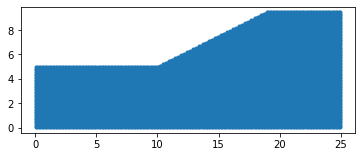

Path result/SlopeFailureAnalysis existed already, continue with writting files


In [6]:
# Soil Geometry
points = [
    (0  , 0),
    (24.875, 0),
    (24.875,9.375),
    (19, 9.375),
    (9.875, 4.875),
    (0, 4.875)
]

b = mp_parser.particle(points, delta = 0.125)
b.translate(0.0625, 0.0625)
filled1 = b.nodes
x1 = [i[0] for i in filled1]
y1 = [i[1] for i in filled1]
plt.plot(x1,y1, '.')
plt.axis('scaled')
plt.show()

b.printFile(fileName = 'soil', folderName = "SlopeFailureAnalysis", digits=4)

In [7]:
# Side Boundaries
nset = []
for key, item in enumerate(a.nodes):
    if item[0] == 0 or item[0] == 25:
#         print(key, item)
        nset.append(key)
print(nset)

[0, 50, 51, 101, 102, 152, 153, 203, 204, 254, 255, 305, 306, 356, 357, 407, 408, 458, 459, 509, 510, 560, 561, 611, 612, 662, 663, 713, 714, 764, 765, 815, 816, 866, 867, 917, 918, 968, 969, 1019, 1020, 1070]


In [8]:
# Bottom Boundaries
nset = []
for key, item in enumerate(a.nodes):
    if item[1] == 0:
#         print(key, item)
        nset.append(key)
print(nset)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [10]:
# Particle Loading
particles = b.nodes
pset = []
tmp = []
for key, item in enumerate(particles):
#     print(key, item)
    if item[1] > 9.437 and item[0] < 22.5 and item[0] > 19.5:
        print(key, item)
        pset.append(key)

print(pset)

10980 [19.5625, 9.4375]
10981 [19.6875, 9.4375]
10982 [19.8125, 9.4375]
10983 [19.9375, 9.4375]
10984 [20.0625, 9.4375]
10985 [20.1875, 9.4375]
10986 [20.3125, 9.4375]
10987 [20.4375, 9.4375]
10988 [20.5625, 9.4375]
10989 [20.6875, 9.4375]
10990 [20.8125, 9.4375]
10991 [20.9375, 9.4375]
10992 [21.0625, 9.4375]
10993 [21.1875, 9.4375]
10994 [21.3125, 9.4375]
10995 [21.4375, 9.4375]
10996 [21.5625, 9.4375]
10997 [21.6875, 9.4375]
10998 [21.8125, 9.4375]
10999 [21.9375, 9.4375]
11000 [22.0625, 9.4375]
11001 [22.1875, 9.4375]
11002 [22.3125, 9.4375]
11003 [22.4375, 9.4375]
[10980, 10981, 10982, 10983, 10984, 10985, 10986, 10987, 10988, 10989, 10990, 10991, 10992, 10993, 10994, 10995, 10996, 10997, 10998, 10999, 11000, 11001, 11002, 11003]


In [4]:
import pandas as pd
df = pd.read_hdf('particles09800.h5', 'table')
print(list(df))
particles_stresses = df[['stress_xx', 'stress_yy', 'stress_zz', 'tau_xy', 'tau_yz', 'tau_xz']].values.tolist()

['id', 'mass', 'volume', 'pressure', 'coord_x', 'coord_y', 'coord_z', 'displacement_x', 'displacement_y', 'displacement_z', 'nsize_x', 'nsize_y', 'nsize_z', 'velocity_x', 'velocity_y', 'velocity_z', 'stress_xx', 'stress_yy', 'stress_zz', 'tau_xy', 'tau_yz', 'tau_xz', 'strain_xx', 'strain_yy', 'strain_zz', 'gamma_xy', 'gamma_yz', 'gamma_xz', 'epsilon_v', 'status', 'cell_id', 'material_id', 'nstate_vars', 'svars_0', 'svars_1', 'svars_2', 'svars_3', 'svars_4', 'svars_5', 'svars_6', 'svars_7', 'svars_8', 'svars_9', 'svars_10', 'svars_11', 'svars_12', 'svars_13', 'svars_14', 'svars_15', 'svars_16', 'svars_17', 'svars_18', 'svars_19']


In [7]:
for key, item in enumerate(particles_stresses):
    print(key, item)

with open(f'result/SlopeFailureAnalysis/particles_stresses.txt', 'w') as f:
    f.write(f'! {len(particles_stresses)} particle(s) \n')
    f.write(f'{len(particles_stresses)}\n')
    for key, item in enumerate(particles_stresses):
        f.write(' '.join([f'{j:.0f}' for j in item]) + '\n')

0 [-19475.956470868216, -43957.45811694555, -19030.024376344234, -36.99540734245125, 0.0, 0.0]
1 [-19475.447153633006, -43956.26970331251, -19029.515057083558, -111.32581365770307, 0.0, 0.0]
2 [-19474.9378363974, -43955.08128967846, -19029.00573782244, -185.65621997387072, 0.0, 0.0]
3 [-19474.42851916217, -43953.89287604414, -19028.496418561885, -259.9866262897908, 0.0, 0.0]
4 [-19491.039741242108, -43958.87459989505, -19034.974302340896, -334.73737402369966, 0.0, 0.0]
5 [-19489.304886557773, -43954.826588483375, -19033.239442512502, -410.7256055645381, 0.0, 0.0]
6 [-19487.57003187431, -43950.7785770753, -19031.504582684884, -486.71383710579863, 0.0, 0.0]
7 [-19485.835177189525, -43946.73056566266, -19029.769722855668, -562.7020686466906, 0.0, 0.0]
8 [-19521.131196461658, -43956.78592241838, -19043.37513566377, -639.834996180483, 0.0, 0.0]
9 [-19517.54107834829, -43948.40896244175, -19039.78501223714, -719.349641664462, 0.0, 0.0]
10 [-19513.95096023447, -43940.03200246517, -19036.19488

1980 [-36238.30521512416, -98395.2125674822, -40390.05533478165, -2154.7995211237926, 0.0, 0.0]
1981 [-36234.8491305454, -98387.08086675864, -40386.57899919105, -2043.5711003526762, 0.0, 0.0]
1982 [-36231.39304596464, -98378.9491660316, -40383.10266359878, -1932.3426795833561, 0.0, 0.0]
1983 [-36227.93696138216, -98370.8174653034, -40379.62632800543, -1821.1142588158984, 0.0, 0.0]
1984 [-36753.007427576595, -98588.70205807716, -40602.512845696445, -1705.9009521284322, 0.0, 0.0]
1985 [-36749.15392450842, -98579.65111894198, -40598.64151303509, -1595.2043190794184, 0.0, 0.0]
1986 [-36745.30042143877, -98570.600179805, -40594.77018037285, -1484.5076860321212, 0.0, 0.0]
1987 [-36741.44691836699, -98561.5492406643, -40590.89884770941, -1373.8110529868836, 0.0, 0.0]
1988 [-37118.213245008585, -98716.14719739078, -40750.308132719976, -1256.1321624986351, 0.0, 0.0]
1989 [-37114.99162688588, -98708.58351032712, -40747.072541164074, -1147.2538915868104, 0.0, 0.0]
1990 [-37111.77000876158, -98701

4174 [-23281.123579840176, -74772.65703036413, -29416.134183061222, -562.3382441209761, 0.0, 0.0]
4175 [-23316.963634706397, -74856.05438819503, -29451.90540687028, -564.0052296087538, 0.0, 0.0]
4176 [-23814.97325636677, -75121.8330483292, -29681.041891408735, -465.83776023899, 0.0, 0.0]
4177 [-23834.682711851743, -75167.60055853993, -29700.684981117665, -461.2072643442491, 0.0, 0.0]
4178 [-23854.392167330097, -75213.36806874616, -29720.3280708231, -456.5767684530951, 0.0, 0.0]
4179 [-23874.101622802184, -75259.13557894935, -29739.97116052516, -451.94627256488735, 0.0, 0.0]
4180 [-24346.574402155922, -75488.04230771374, -29950.385012960905, -386.97838646449867, 0.0, 0.0]
4181 [-24355.109768664504, -75507.75644596283, -29958.859864388138, -376.5534670086096, 0.0, 0.0]
4182 [-24363.64513517009, -75527.47058420443, -29967.334715812292, -366.12854755469255, 0.0, 0.0]
4183 [-24372.180501671883, -75547.18472243733, -29975.80956723279, -355.703628102632, 0.0, 0.0]
4184 [-24785.135581169718, -

6210 [-8576.09382439693, -23639.881613361085, -9664.792631327427, -3823.88579994173, 0.0, 0.0]
6211 [-9056.316170333866, -24759.507760274155, -10144.7471791824, -3964.2480823652936, 0.0, 0.0]
6212 [-7985.765516974034, -25160.27133370502, -9943.811055203636, -3296.5650809624467, 0.0, 0.0]
6213 [-8407.476488411445, -26143.602099595664, -10365.32357640214, -3438.5246761991248, 0.0, 0.0]
6214 [-8829.187459076262, -27126.932864817863, -10786.836097168212, -3580.4842713387693, 0.0, 0.0]
6215 [-9250.89842896574, -28110.263629364923, -11208.348617499167, -3722.443866381439, 0.0, 0.0]
6216 [-8261.402939857195, -28463.304852065245, -11017.412337576727, -2951.715849716999, 0.0, 0.0]
6217 [-8655.195073059602, -29381.414417250566, -11410.982847093108, -3089.4425110707975, 0.0, 0.0]
6218 [-9048.987206729515, -30299.52398315829, -11804.553356966258, -3227.169172574625, 0.0, 0.0]
6219 [-9442.779340867079, -31217.633549788465, -12198.123867196675, -3364.8958342286123, 0.0, 0.0]
6220 [-8501.860099176687